In [24]:
import pandas as pd
import numpy as np
import codecs
%matplotlib inline

# Taxa de sucesso

### Fórmula

definido em **Documentos/Manual-Indicadores-TCU.pdf**, página 5

<img src="formula_taxa_de_sucesso_TCU.png" />

### Observações sobre a fórmula

**Documentos/Manual-Indicadores-TCU.pdf**, página 12

<img src="observacoes_taxa_de_sucesso_TCU.png" />

# Dataset

In [4]:
dataset_path = '../Dados/taxa-de-sucesso-por-curso-ufc.csv'

## Dataset.readme

<a href="../Dados/taxa-de-sucesso-por-curso-ufc.csv.readme" >README</a>

## Analisando o dataset

In [5]:
df = pd.read_csv('../Dados/taxa-de-sucesso-por-curso-ufc.csv', encoding='utf-8', decimal=',', na_values='-')

In [6]:
df.head(2)

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011
0,57,37274,Filosofia - Licenciatura,Noturno,1,45,57,223.1,43.8,34.6
1,35,13976,Geografia - Licenciatura,Diurno,2,6,8,219.0,100.0,101.6


In [7]:
df.shape

(81, 10)

In [8]:
df.columns

Index([  u'Código UFC',  u'Código INEP',        u'Curso',      u'Período',
       u'Ranking 2013', u'Ranking 2012', u'Ranking 2011',      u'TS 2013',
            u'TS 2012',      u'TS 2011'],
      dtype='object')

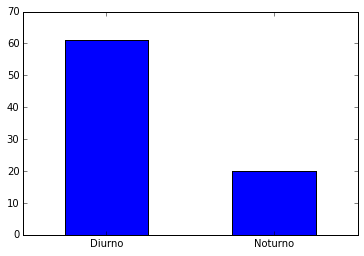

In [9]:
df[u'Período'].value_counts().plot(kind='bar', rot=0)

## Analisando a variação no rank

### para 10 exemplos de curso

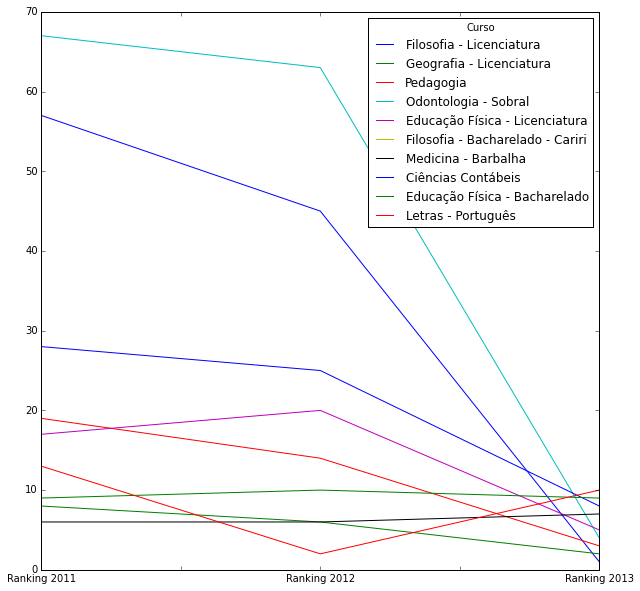

In [10]:
df[:10][['Ranking 2011', 'Ranking 2012', 'Ranking 2013', 'Curso']].set_index('Curso').T.plot(figsize=(10, 10))

## Taxas de sucesso acima de 100%

### registros com taxa de sucesso de pelo menos um ano acima de 100%

In [11]:
df[(df[['TS 2011', 'TS 2012', 'TS 2013']] > 100.).any(axis=1)]

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011
0,57,37274,Filosofia - Licenciatura,Noturno,1,45,57,223.1,43.8,34.6
1,35,13976,Geografia - Licenciatura,Diurno,2,6,8,219.0,100.0,101.6
2,52,13967,Pedagogia,Diurno,3,14,19,143.6,84.3,81.4
3,205,99308,Odontologia - Sobral,Diurno,4,63,67,135.0,NaN,7.5
4,45,14000,Educação Física - Licenciatura,Diurno,5,20,17,124.0,76.0,84.0
5,NaN,399346,Filosofia - Bacharelado - Cariri,Noturno,6,NaN,NaN,122.2,NaN,NaN
6,301,54494,Medicina - Barbalha,Diurno,7,6,6,107.5,100.0,105.0
7,10,13969,Ciências Contábeis,Diurno,8,25,28,106.3,68.8,67.5
8,46,100256,Educação Física - Bacharelado,Diurno,9,10,9,104.0,92.0,100.0
9,37A,29489,Letras - Português,Diurno,10,2,13,102.8,113.9,89.0


# Essas taxas de sucesso acima de 100% merecem ser analisadas
Principalmente com vistas à definição do indicador, observando a forma de cálculo de ingressantes, igual à quantidade de ingressantes que, de acordo com a duração do curso, deveriam estar se formando no ano em questão

# <span style="color:red">TODO</span>
Entrar em contato com a UFC solicitando a metodologia utilizada no cálculo do indicador

### Pedido de informação realizado no e-sic

**Protocolo**: 23480.011861/2015-58

**Conteúdo**: 
No anuário estatístico de 2014, ano base 2013, da UFC, páginas 63 e 64, são reportados valores para o indicador "Taxa de sucesso da graduação por curso". 
Considerando que tal indicador foi calculado de acordo com a definição constante no documento "ORIENTAÇÕES PARA O CÁLCULO DOS INDICADORES DE GESTÃO" (DECISÃO Nº 408/2002-PLENÁRIO e ACÓRDÃOS N° 1043/2006 e N°  2167/2006 – PLENÁRIO TRIBUNAL DE CONTAS DA UNIÃO), solicito os valores das variáveis utilizadas para o cálculo, a saber, para cada ano (2011, 2012, 2013) e cursos* reportados:

1) Nº de diplomados

2) Nº total de ingressantes

\* lista dos cursos constantes da tabela no anexo lista_cursos.csv

obs: *lista_cursos.csv é um df.Curso.to_csv('lista_cursos.csv', encoding='utf-8')*

# Gerando .tex com tabela com colunas [Curso, Período e TS 2013]

In [12]:
colunas_porcentagem = ['TS 2013', 'TS 2012', 'TS 2011']

In [13]:
def to_pct(x):
    
    if np.isnan(x):
        
        return 'missing'
        
    return '{}%'.format(x)

df[colunas_porcentagem] = df[colunas_porcentagem].applymap(to_pct)

In [14]:
df.head(10)

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011
0,57,37274,Filosofia - Licenciatura,Noturno,1,45,57,223.1%,43.8%,34.6%
1,35,13976,Geografia - Licenciatura,Diurno,2,6,8,219.0%,100.0%,101.6%
2,52,13967,Pedagogia,Diurno,3,14,19,143.6%,84.3%,81.4%
3,205,99308,Odontologia - Sobral,Diurno,4,63,67,135.0%,missing,7.5%
4,45,14000,Educação Física - Licenciatura,Diurno,5,20,17,124.0%,76.0%,84.0%
5,NaN,399346,Filosofia - Bacharelado - Cariri,Noturno,6,NaN,NaN,122.2%,missing,missing
6,301,54494,Medicina - Barbalha,Diurno,7,6,6,107.5%,100.0%,105.0%
7,10,13969,Ciências Contábeis,Diurno,8,25,28,106.3%,68.8%,67.5%
8,46,100256,Educação Física - Bacharelado,Diurno,9,10,9,104.0%,92.0%,100.0%
9,37A,29489,Letras - Português,Diurno,10,2,13,102.8%,113.9%,89.0%


In [15]:
df.head()

,Código UFC,Código INEP,Curso,Período,Ranking 2013,Ranking 2012,Ranking 2011,TS 2013,TS 2012,TS 2011
0,57,37274,Filosofia - Licenciatura,Noturno,1,45,57,223.1%,43.8%,34.6%
1,35,13976,Geografia - Licenciatura,Diurno,2,6,8,219.0%,100.0%,101.6%
2,52,13967,Pedagogia,Diurno,3,14,19,143.6%,84.3%,81.4%
3,205,99308,Odontologia - Sobral,Diurno,4,63,67,135.0%,missing,7.5%
4,45,14000,Educação Física - Licenciatura,Diurno,5,20,17,124.0%,76.0%,84.0%


In [16]:
df = df.sort('Ranking 2013')

In [19]:
with codecs.open('ts_2013_completo.tex', 'w', encoding='utf-8') as f:
    f.write(df[['Curso', u'Período', 'TS 2013']].iloc[::-1].to_latex())

# Taxa de sucesso consolidada por ano

# Dataset

In [1]:
dataset_path = '../Dados/taxa-de-sucesso-ufc.csv'

## Dataset.readme

<a href="../Dados/taxa-de-sucesso-ufc.csv.readme">README</a>

## Analisando o dataset

In [20]:
df = pd.read_csv('../Dados/taxa-de-sucesso-ufc.csv', dtype={'Ano': np.str})

In [21]:
df = df.set_index('Ano')
df

,Taxa de sucesso
Ano,
2008,70.00
2009,68.86
2010,68.45
2011,69.06
2012,66.63
2013,56.51


# Plot para a dissertação

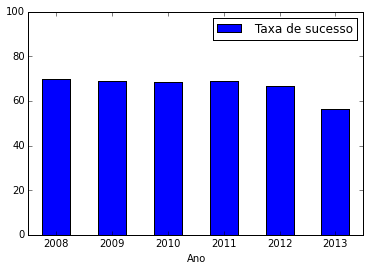

In [23]:
ax = df.plot(kind='bar', ylim=[0.0, 100.0], rot=0)
ax.get_figure().savefig(u'../Dissertação/img/taxa-de-sucesso-ufc.png')